In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!ls data/

OEM_Emergency_Notifications.csv   tweets_3.csv
OEM_Non_Outages.csv               tweets_pseg_dec13_sep20.csv
nlp_tweets.csv                    tweets_pseg_jun27_apr06.csv
nlp_tweets_2012_2017.csv          tweets_pseg_sep6_july2
non_outages.csv                   weather_target_drop_merged.csv
open_nyc.csv                      weather_target_merged.csv
target.csv                        weather_target_numerical.csv
tweets.csv                        weather_target_numerical_drop.csv
tweets_2.csv                      working_df.csv


In [3]:
df = pd.read_csv('./data/weather_target_numerical_drop.csv')

In [4]:
df.shape

(6215, 58)

In [5]:
df.head(2)

,datetime,aerial_(fly-over),drills/exercises,environmental,fire,infrastructure,mass_transit_disruption,mass_transit_restoration,missing_adult,missing_child/adolescent,...,smoke,snow,squalls,thunderstorm,thunderstorm_with_heavy_rain,thunderstorm_with_light_drizzle,thunderstorm_with_light_rain,thunderstorm_with_rain,very_heavy_rain,outage
0,2012-10-02 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-10-02 03:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df['datetime'].dtypes

dtype('O')

In [7]:
df.groupby('outage').mean().T

outage,0,1
aerial_(fly-over),0.023990,0.000000
drills/exercises,0.027787,0.000000
environmental,0.079220,0.000000
fire,0.052468,0.000000
infrastructure,0.000345,0.000000
mass_transit_disruption,0.167932,0.002375
mass_transit_restoration,0.021229,0.000000
missing_adult,0.120297,0.000000
missing_child/adolescent,0.014325,0.000000
parking,0.009493,0.000000


In [8]:
# df.groupby('outage').mean().T < 0.5

In [33]:
df['wind_speed_mph'].groupby(df['outage']).mean()

outage
0    6.754746
1    7.045131
Name: wind_speed_mph, dtype: float64

In [10]:
df.datetime = pd.to_datetime(df.datetime)

In [11]:
date_df = df.set_index('datetime').sort_index()

In [29]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [38]:
p = figure(plot_width=400, plot_height=400, x_axis_type="datetime")
p.line(date_df.index, date_df['temperature_f'])

GlyphRenderer(id='3296', ...)

In [40]:
show(p)

In [42]:
date_df.index

DatetimeIndex(['2012-10-02 00:00:00', '2012-10-02 03:00:00',
               '2012-10-02 12:00:00', '2012-10-02 14:00:00',
               '2012-10-03 08:00:00', '2012-10-03 15:00:00',
               '2012-10-04 05:00:00', '2012-10-04 06:00:00',
               '2012-10-04 07:00:00', '2012-10-04 09:00:00',
               ...
               '2017-10-24 07:00:00', '2017-10-24 15:00:00',
               '2017-10-25 12:00:00', '2017-10-25 17:00:00',
               '2017-10-26 15:00:00', '2017-10-27 03:00:00',
               '2017-10-27 09:00:00', '2017-10-27 15:00:00',
               '2017-10-27 17:00:00', '2017-10-27 20:00:00'],
              dtype='datetime64[ns]', name='datetime', length=6215, freq=None)

In [45]:
df_13 = date_df[(date_df.index > '2013-01-01') & (date_df.index < '2013-12-31')]

In [55]:
p13 = figure(plot_width=550, plot_height=400, x_axis_type="datetime")
p13.line(df_13.index, df_13['temperature_f'])
show(p13)

In [94]:
# date_df.outage[date_df.outage == 1]

<Figure size 1440x720 with 0 Axes>

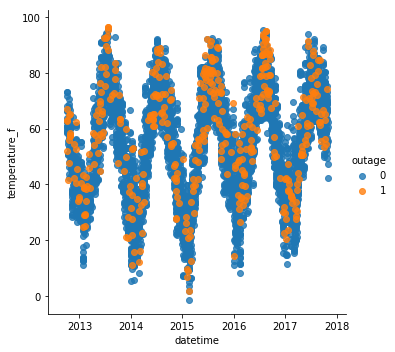

In [93]:
import seaborn as sns
plt.figure(figsize = (20, 10))
sns.lmplot('datetime', 'temperature_f', df, hue='outage', fit_reg=False)
# fig = plt.gcf()
# fig.set_size_inches(25, 20)
# plt.show()

<Figure size 1440x720 with 0 Axes>

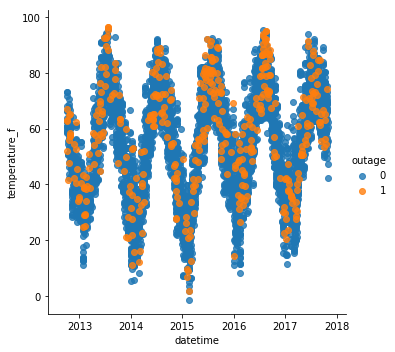

In [83]:
import seaborn as sns
plt.figure(figsize = (20, 10))
sns.lmplot('datetime', 'temperature_f', df, hue='outage', fit_reg=False);
# fig = plt.gcf()
# fig.set_size_inches(25, 20)
# plt.show()

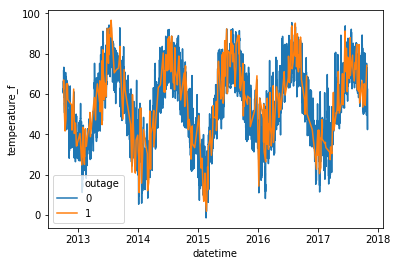

In [67]:
ax = sns.lineplot(x=date_df.index, y="temperature_f", hue="outage", data=date_df)

In [73]:
date_df[date_df['outage'] == 1].index

DatetimeIndex(['2012-10-04 05:00:00', '2012-10-04 10:00:00',
               '2012-10-04 15:00:00', '2012-10-08 15:00:00',
               '2012-10-13 11:00:00', '2012-10-19 03:00:00',
               '2012-10-19 14:00:00', '2012-10-21 00:00:00',
               '2012-10-27 18:00:00', '2012-10-29 07:00:00',
               ...
               '2017-09-05 19:00:00', '2017-09-07 15:00:00',
               '2017-09-09 12:00:00', '2017-09-24 07:00:00',
               '2017-09-29 12:00:00', '2017-10-07 12:00:00',
               '2017-10-12 05:00:00', '2017-10-12 12:00:00',
               '2017-10-13 13:00:00', '2017-10-22 19:00:00'],
              dtype='datetime64[ns]', name='datetime', length=421, freq=None)

In [97]:
date_df.columns

Index(['aerial_(fly-over)', 'drills/exercises', 'environmental', 'fire',
       'infrastructure', 'mass_transit_disruption', 'mass_transit_restoration',
       'missing_adult', 'missing_child/adolescent', 'parking',
       'public_awareness', 'public_health', 'road_closure',
       'school_notification', 'structural', 'utility', 'weather',
       'temperature_f', 'wind_dir_degrees', 'wind_speed_mph', 'broken_clouds',
       'drizzle', 'dust', 'few_clouds', 'fog', 'freezing_rain', 'haze',
       'heavy_intensity_drizzle', 'heavy_intensity_rain', 'heavy_snow',
       'heavy_thunderstorm', 'light_intensity_drizzle',
       'light_intensity_shower_rain', 'light_rain', 'light_rain_and_snow',
       'light_snow', 'mist', 'moderate_rain', 'overcast_clouds',
       'proximity_thunderstorm', 'proximity_thunderstorm_with_drizzle',
       'proximity_thunderstorm_with_rain', 'sand', 'sand/dust_whirls',
       'scattered_clouds', 'shower_rain', 'sky_is_clear', 'smoke', 'snow',
       'squalls', 'th

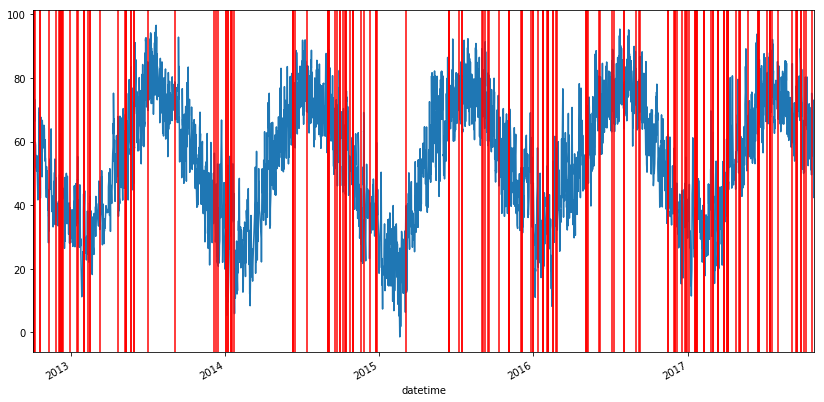

In [98]:
date_df.temperature_f.plot(figsize = (14, 7))
vlines = date_df[date_df['fog'] == 1].index
for line in vlines:
    plt.axvline(line, color = 'red')

In [102]:
dates = date_df.index.to_list()

In [106]:
outages = date_df.outage.to_list()

In [123]:
outage_coord = list(zip(dates, outages))

In [138]:
len(outage_coord)

6215

In [126]:
outage_coord.

AttributeError: 'list' object has no attribute 'items'

In [145]:
# x = []
# for i in range(6217):
#     for coordinate in outage_coord:
#         print(coordinate[i])

2012-10-02 00:00:00
2012-10-02 03:00:00
2012-10-02 12:00:00
2012-10-02 14:00:00
2012-10-03 08:00:00
2012-10-03 15:00:00
2012-10-04 05:00:00
2012-10-04 06:00:00
2012-10-04 07:00:00
2012-10-04 09:00:00
2012-10-04 10:00:00
2012-10-04 12:00:00
2012-10-04 15:00:00
2012-10-04 18:00:00
2012-10-05 07:00:00
2012-10-05 12:00:00
2012-10-05 18:00:00
2012-10-05 19:00:00
2012-10-06 10:00:00
2012-10-06 12:00:00
2012-10-07 08:00:00
2012-10-07 23:00:00
2012-10-08 15:00:00
2012-10-10 08:00:00
2012-10-10 16:00:00
2012-10-11 08:00:00
2012-10-13 11:00:00
2012-10-13 22:00:00
2012-10-15 06:00:00
2012-10-15 18:00:00
2012-10-15 22:00:00
2012-10-16 07:00:00
2012-10-16 09:00:00
2012-10-16 10:00:00
2012-10-16 17:00:00
2012-10-16 22:00:00
2012-10-17 00:00:00
2012-10-17 05:00:00
2012-10-17 06:00:00
2012-10-17 07:00:00
2012-10-17 13:00:00
2012-10-18 01:00:00
2012-10-18 02:00:00
2012-10-19 03:00:00
2012-10-19 07:00:00
2012-10-19 12:00:00
2012-10-19 14:00:00
2012-10-19 17:00:00
2012-10-20 07:00:00
2012-10-20 13:00:00


2014-12-09 12:00:00
2014-12-09 14:00:00
2014-12-09 15:00:00
2014-12-09 19:00:00
2014-12-10 08:00:00
2014-12-10 09:00:00
2014-12-10 11:00:00
2014-12-10 15:00:00
2014-12-10 19:00:00
2014-12-10 20:00:00
2014-12-10 21:00:00
2014-12-10 22:00:00
2014-12-11 02:00:00
2014-12-11 07:00:00
2014-12-11 08:00:00
2014-12-11 17:00:00
2014-12-12 01:00:00
2014-12-12 02:00:00
2014-12-12 08:00:00
2014-12-12 16:00:00
2014-12-12 18:00:00
2014-12-12 20:00:00
2014-12-12 21:00:00
2014-12-13 15:00:00
2014-12-13 18:00:00
2014-12-13 19:00:00
2014-12-15 01:00:00
2014-12-15 04:00:00
2014-12-15 09:00:00
2014-12-16 07:00:00
2014-12-16 17:00:00
2014-12-16 20:00:00
2014-12-17 06:00:00
2014-12-17 10:00:00
2014-12-17 12:00:00
2014-12-17 15:00:00
2014-12-17 23:00:00
2014-12-18 16:00:00
2014-12-18 17:00:00
2014-12-18 20:00:00
2014-12-19 12:00:00
2014-12-19 15:00:00
2014-12-19 19:00:00
2014-12-20 15:00:00
2014-12-20 16:00:00
2014-12-20 19:00:00
2014-12-20 22:00:00
2014-12-20 23:00:00
2014-12-21 15:00:00
2014-12-22 05:00:00


2016-10-18 08:00:00
2016-10-18 09:00:00
2016-10-18 12:00:00
2016-10-18 19:00:00
2016-10-19 00:00:00
2016-10-19 08:00:00
2016-10-19 15:00:00
2016-10-19 16:00:00
2016-10-19 17:00:00
2016-10-20 11:00:00
2016-10-20 14:00:00
2016-10-20 15:00:00
2016-10-21 05:00:00
2016-10-21 06:00:00
2016-10-21 14:00:00
2016-10-21 19:00:00
2016-10-22 05:00:00
2016-10-22 07:00:00
2016-10-22 15:00:00
2016-10-23 07:00:00
2016-10-23 13:00:00
2016-10-23 15:00:00
2016-10-24 02:00:00
2016-10-24 08:00:00
2016-10-24 10:00:00
2016-10-24 17:00:00
2016-10-25 15:00:00
2016-10-26 08:00:00
2016-10-26 13:00:00
2016-10-26 15:00:00
2016-10-27 00:00:00
2016-10-27 03:00:00
2016-10-27 04:00:00
2016-10-27 06:00:00
2016-10-27 11:00:00
2016-10-27 15:00:00
2016-10-27 18:00:00
2016-10-27 19:00:00
2016-10-27 20:00:00
2016-10-27 21:00:00
2016-10-28 07:00:00
2016-10-28 08:00:00
2016-10-28 13:00:00
2016-10-28 15:00:00
2016-10-28 19:00:00
2016-10-28 20:00:00
2016-10-28 23:00:00
2016-10-29 07:00:00
2016-10-30 01:00:00
2016-10-30 02:00:00


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


IndexError: tuple index out of range

In [122]:
outage_coord[0][0]

Timestamp('2012-10-02 00:00:00')

In [117]:
sns.scatterplot(outage_coord[0])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1a141ec620> (for post_execute):


ValueError: view limit minimum -36831.49166666667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36831.49166666667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units